In [294]:
print('hello world')

#PART 1: wordcount for the novels of F. Scott Fitzgerald
#set up word counter
import re
from collections import Counter
import pandas as pd

def split_into_words(any_chunk_of_text):
    lowercase_text=any_chunk_of_text.lower()
    split_words=re.split("\W+", lowercase_text)
    return split_words

filepath_of_text = "/Users/lauraruizviejobueno/Documents/qmul_3rd_year_courses/criticism_and_code/final_project/corpus/1934_TenderIsTheNight.txt",
filepath_of_text = "/Users/lauraruizviejobueno/Documents/qmul_3rd_year_courses/criticism_and_code/final_project/corpus/1920_ThisSideOfParadise.txt"
number_of_desired_words=50

full_text=open(filepath_of_text, encoding="utf-8").read()

all_the_words=split_into_words(full_text)

meaningful_words=[word for word in all_the_words]

meaningful_words_counter=Counter(meaningful_words)

meaningful_words_tally=[list(item) for item in meaningful_words_counter.items()]

meaningful_words_df=pd.DataFrame(meaningful_words_tally, columns=['term', 'count'])

meaningful_words_df = meaningful_words_df.sort_values(by=['count'], ascending=False).reset_index()
meaningful_words_df = meaningful_words_df.drop("index", axis="columns")

meaningful_words_df[0:21]



hello world


<>:11: SyntaxWarning: invalid escape sequence '\W'
<>:11: SyntaxWarning: invalid escape sequence '\W'
/var/folders/nx/6kw_6cf939g0dtk7wlv3rgmc0000gn/T/ipykernel_41797/3112848038.py:11: SyntaxWarning: invalid escape sequence '\W'
  split_words=re.split("\W+", lowercase_text)


,term,count
0,the,4086
1,and,2625
2,a,2197
3,of,2095
4,to,1890
5,he,1546
6,in,1379
7,i,1362
8,you,1208
9,that,1144


In [295]:
#compare lists of most frequent words in df1 and df2
def getWords(filepath_of_text):
    full_text=open(filepath_of_text, encoding="utf-8").read()
    all_the_words=split_into_words(full_text)
    meaningful_words=all_the_words
    meaningful_words=[word for word in all_the_words]
    meaningful_words_counter=Counter(meaningful_words)
    meaningful_words_tally=[list(item) for item in meaningful_words_counter.items()]
    meaningful_words_df=pd.DataFrame(meaningful_words_tally, columns=['term', 'count'])
    meaningful_words_df = meaningful_words_df.sort_values("count", ascending=False)
    meaningful_words_df = meaningful_words_df.head(50)
    return meaningful_words_df

filepath_of_text = "/Users/lauraruizviejobueno/Documents/qmul_3rd_year_courses/criticism_and_code/final_project/corpus/1934_TenderIsTheNight.txt"
df1 = getWords(filepath_of_text)
filepath_of_text = "/Users/lauraruizviejobueno/Documents/qmul_3rd_year_courses/criticism_and_code/final_project/corpus/1920_ThisSideOfParadise.txt"
df2 = getWords(filepath_of_text)

In [296]:
df1.head(15)

,term,count
1,the,5891
12,and,3111
16,a,2904
121,to,2793
4,of,2730
52,in,1923
136,he,1868
44,was,1682
278,i,1671
256,she,1517


In [297]:
df2.head(15)

,term,count
9,the,4086
28,and,2625
24,a,2197
30,of,2095
54,to,1890
81,he,1546
47,in,1379
334,i,1362
379,you,1208
13,that,1144


In [298]:
df1['rank'] = df1['count'].rank(ascending=False)
df1.head(15)

,term,count,rank
1,the,5891,1.0
12,and,3111,2.0
16,a,2904,3.0
121,to,2793,4.0
4,of,2730,5.0
52,in,1923,6.0
136,he,1868,7.0
44,was,1682,8.0
278,i,1671,9.0
256,she,1517,10.0


In [299]:
df2['rank'] = df2['count'].rank(ascending=False)
df2.head(15)

,term,count,rank
9,the,4086,1.0
28,and,2625,2.0
24,a,2197,3.0
30,of,2095,4.0
54,to,1890,5.0
81,he,1546,6.0
47,in,1379,7.0
334,i,1362,8.0
379,you,1208,9.0
13,that,1144,10.0


In [300]:
import numpy as np


In [301]:
#Merge DataFrames on 'term' to get a combined DataFrame
merged_df = pd.merge(df1, df2, on='term', how='outer', suffixes=('_df1', '_df2'))
merged_df.head(10)

,term,count_df1,rank_df1,count_df2,rank_df2
0,the,5891.0,1.0,4086.0,1.0
1,and,3111.0,2.0,2625.0,2.0
2,a,2904.0,3.0,2197.0,3.0
3,to,2793.0,4.0,1890.0,5.0
4,of,2730.0,5.0,2095.0,4.0
5,in,1923.0,6.0,1379.0,7.0
6,he,1868.0,7.0,1546.0,6.0
7,was,1682.0,8.0,915.0,12.0
8,i,1671.0,9.0,1362.0,8.0
9,she,1517.0,10.0,558.0,19.0


In [302]:
#Fill NaN values with 0, as NaN indicates that the term is not present in one of the DataFrames
merged_df = merged_df.fillna(0)

In [303]:
#Create word frequency vectors
word_freq_vector_df1 = merged_df['rank_df1'].values
word_freq_vector_df2 = merged_df['rank_df2'].values

print("Word Frequency Vector for DataFrame 1:")
print(word_freq_vector_df1)

print("\nWord Frequency Vector for DataFrame 2:")
print(word_freq_vector_df2)

Word Frequency Vector for DataFrame 1:
[ 1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
 29.  30.  31.  32.  33.  34.  35.5 35.5 37.  38.  39.  40.  41.  42.
 43.  44.  45.  46.  47.  48.5 48.5 50.   0.   0.   0.   0.   0.   0.
  0. ]

Word Frequency Vector for DataFrame 2:
[ 1.   2.   3.   5.   4.   7.   6.  12.   8.  19.   9.  11.  10.  23.
 16.  14.  17.  15.   0.  18.  22.  25.  21.  24.  26.  27.  20.   0.
 33.  39.  32.  44.5 31.  41.  29.   0.  36.5 34.   0.  40.  30.  35.
 43.  28.   0.  48.  36.5  0.  38.   0.  13.  42.  44.5 46.  47.  49.
 50. ]


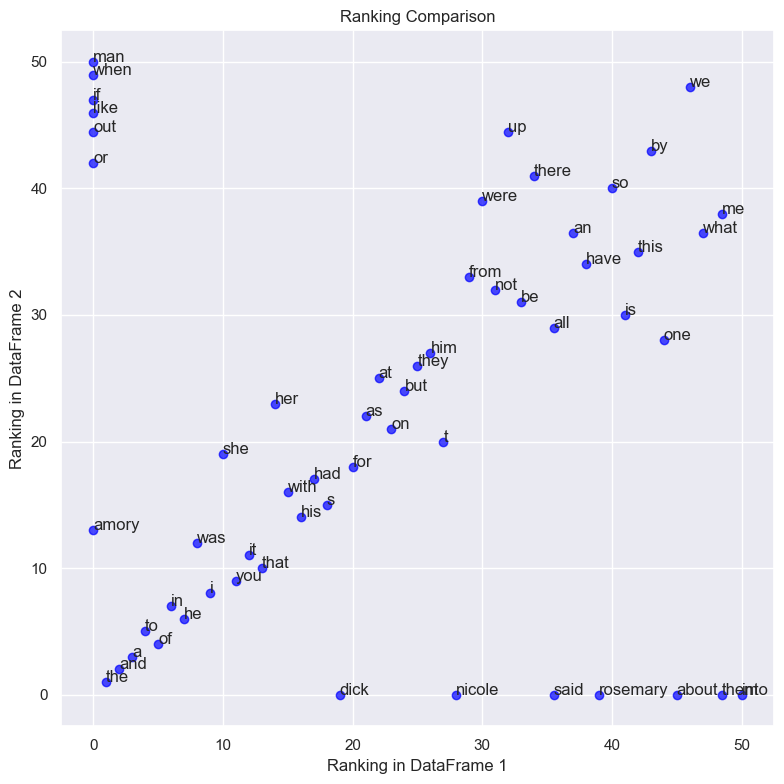

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

#Create word ranking vectors
word_ranking_df1 = merged_df['rank_df1'].values
word_ranking_df2 = merged_df['rank_df2'].values

fig, ax = plt.subplots(figsize=(8, 8))

#Scatter plot of rankings
ax.scatter(merged_df['rank_df1'], merged_df['rank_df2'], color='blue', alpha=0.7)

#Customize plot
ax.set_xlabel('Ranking in DataFrame 1')
ax.set_ylabel('Ranking in DataFrame 2')
ax.set_title('Ranking Comparison')
ax.grid(True)

#Annotate each point with the term
for i, term in enumerate(merged_df['term']):
    ax.annotate(term, (merged_df['rank_df1'][i], merged_df['rank_df2'][i]))

plt.tight_layout()
plt.show()

In [305]:
#remove outliers (words that only appear in one book)
merged_df = merged_df[(merged_df['rank_df1'] != 0) & (merged_df['rank_df2'] != 0)].reset_index(drop=True)

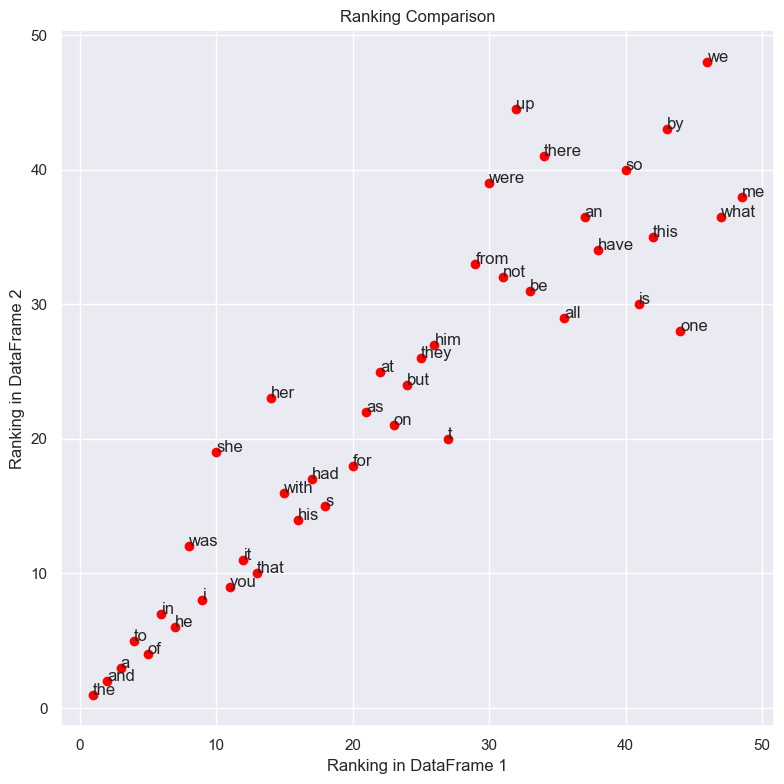

In [306]:

#Plotting
fig, ax = plt.subplots(figsize=(8, 8))

#Highlight the points closest to the line
ax.scatter(merged_df['rank_df1'], merged_df['rank_df2'], color='red', marker='o')

#Customize plot
ax.set_xlabel('Ranking in DataFrame 1')
ax.set_ylabel('Ranking in DataFrame 2')
ax.set_title('Ranking Comparison')
ax.grid(True)

#annotate each highlighted point with the term
for i, term in enumerate(merged_df['term']):
    ax.annotate(term, (merged_df['rank_df1'][i], merged_df['rank_df2'][i]))


plt.tight_layout()

In [307]:
#Calculate the correlation for the highlighted points
correlation = np.corrcoef(merged_df['rank_df1'], merged_df['rank_df2'])[0, 1]
print(f"Correlation for the highlighted points: {correlation}")

plt.show()

Correlation for the highlighted points: 0.9207065572935264


In [308]:
#arrange correlation values in a list to create a matrix
correlation_matrix = np.array([[1.        , 0.91167296, 0.89655829, 0.89657603, 0.88862053],
                                [0.91167296, 1.        , 0.92070655, 0.89760607, 0.95723082],
                                [0.89655829, 0.92070655, 1.        , 0.89089507, 0.93033288],
                                [0.89657603, 0.89760607, 0.89089507, 1.        , 0.87944427],
                                [0.88862053, 0.95723082, 0.93033288, 0.87944427, 1.        ]])


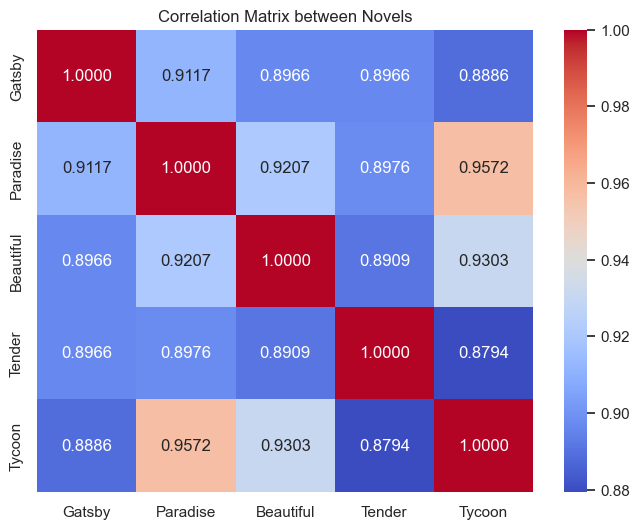

In [309]:
#Create a heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f",
            xticklabels=['Gatsby', 'Paradise', 'Beautiful', 'Tender', 'Tycoon'],
            yticklabels=['Gatsby', 'Paradise', 'Beautiful', 'Tender', 'Tycoon'])

plt.title('Correlation Matrix between Novels')
plt.show()

In [310]:
#PART 2: compare 2 novels between 3 different authors: Fitzgerald, Shakespeare and Defoe

from itertools import combinations
import networkx as nx

#redefine the dataframes
def compareFiles(filepath_of_text1, filepath_of_text2):
    df1 = getWords(filepath_of_text1)
    df2 = getWords(filepath_of_text2)
    df1['rank'] = df1['count'].rank(ascending=False)
    df2['rank'] = df2['count'].rank(ascending=False)
    merged_df = pd.merge(df1, df2, on='term', how='outer', suffixes=('_df1', '_df2'))
    # Fill NaN values with 0, as NaN indicates that the term is not present in one of the DataFrames
    merged_df = merged_df.fillna(0)
    #remove outliers (words that only appear in one book)
    merged_df = merged_df[(merged_df['rank_df1'] != 0) & (merged_df['rank_df2'] != 0)].reset_index(drop=True)
    correlation = np.corrcoef(merged_df['rank_df1'], merged_df['rank_df2'])[0, 1]
    return correlation

all_files = [
    "corpus/1603_Othello.txt",
    "corpus/1606_Macbeth.txt",
    "corpus/1719_RobinsonCrusoe.txt",
    "corpus/1722_AJournalOfThePlagueYear.txt",
    "corpus/1925_GreatGatsby.txt",
    "corpus/1934_TenderIsTheNight.txt"
]

compareFiles(all_files[0], all_files[1])

0.8710248108774994

In [311]:
#calculate the correlation values for every binary combinations from the 6 novels we're comparing
subsets = list(combinations(all_files, 2))

#print the subsets
correlation_values = []
for subset in subsets:
    c = compareFiles(subset[0], subset[1])
    correlation_values.append(c)

#print the correlation values 
for subset, correlation in zip(subsets, correlation_values):
    print(subset, correlation)

('corpus/1603_Othello.txt', 'corpus/1606_Macbeth.txt') 0.8710248108774994
('corpus/1603_Othello.txt', 'corpus/1719_RobinsonCrusoe.txt') 0.8240517297249674
('corpus/1603_Othello.txt', 'corpus/1722_AJournalOfThePlagueYear.txt') 0.5688695560369853
('corpus/1603_Othello.txt', 'corpus/1925_GreatGatsby.txt') 0.655034744784339
('corpus/1603_Othello.txt', 'corpus/1934_TenderIsTheNight.txt') 0.5421508619975741
('corpus/1606_Macbeth.txt', 'corpus/1719_RobinsonCrusoe.txt') 0.7707781288689045
('corpus/1606_Macbeth.txt', 'corpus/1722_AJournalOfThePlagueYear.txt') 0.5442748872390899
('corpus/1606_Macbeth.txt', 'corpus/1925_GreatGatsby.txt') 0.7321472455330422
('corpus/1606_Macbeth.txt', 'corpus/1934_TenderIsTheNight.txt') 0.6035265752151918
('corpus/1719_RobinsonCrusoe.txt', 'corpus/1722_AJournalOfThePlagueYear.txt') 0.9036997788391166
('corpus/1719_RobinsonCrusoe.txt', 'corpus/1925_GreatGatsby.txt') 0.7549967699693864
('corpus/1719_RobinsonCrusoe.txt', 'corpus/1934_TenderIsTheNight.txt') 0.70745264

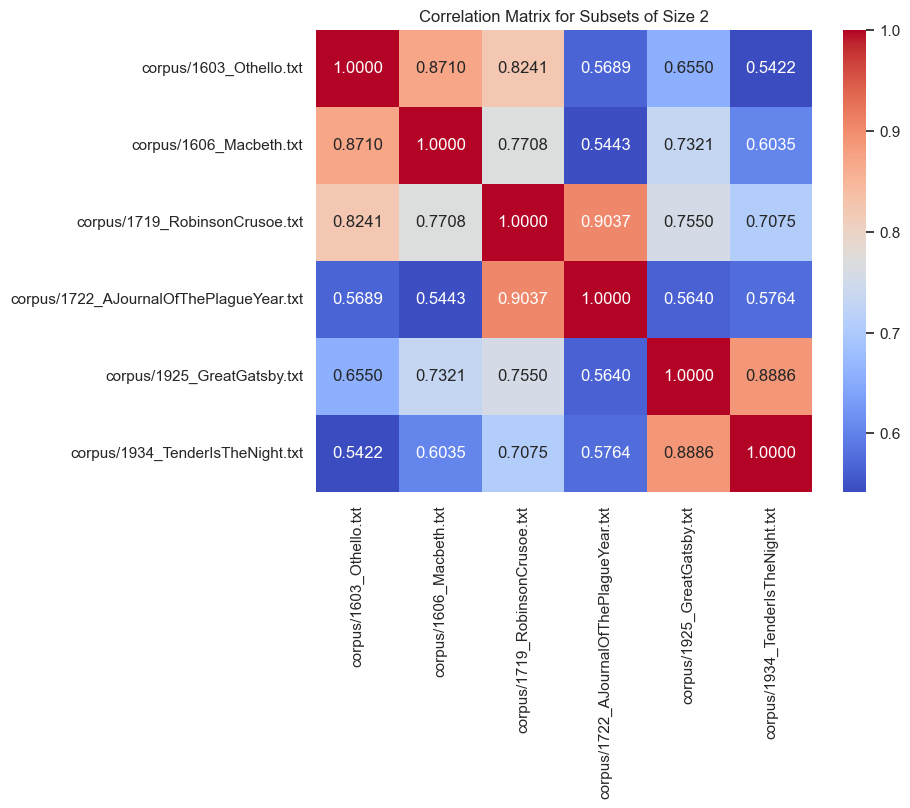

In [312]:
#create another heatmap for these values
correlation_matrix = np.zeros((len(all_files), len(all_files)))
label_to_index = {label: index for index, label in enumerate(all_files)}

for i, (file_a, file_b) in enumerate(subsets):
    index_a, index_b = label_to_index[file_a], label_to_index[file_b]
    correlation_matrix[index_a, index_b] = correlation_values[i]
    correlation_matrix[index_b, index_a] = correlation_values[i]

for i in range(len(all_files)):
    correlation_matrix[i, i] = 1

# Create a heatmap using seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f",
            xticklabels=all_files, yticklabels=all_files)

plt.title('Correlation Matrix for Subsets of Size 2')
plt.show()

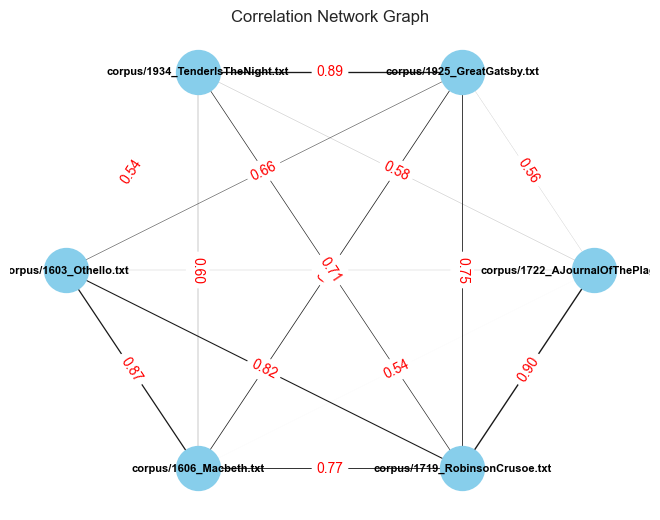

In [313]:
#create a graph
G = nx.Graph()

#add nodes
G.add_nodes_from(all_files)

#add edges with weights
for i, (file_a, file_b) in enumerate(subsets):
    correlation = correlation_values[i]
    G.add_edge(file_a, file_b, weight=correlation)
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
min_weight = min(edge_weights)
max_weight = max(edge_weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in edge_weights]

#draw the graph
pos = nx.shell_layout(G) 
nx.draw(G, pos, width=normalized_weights, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_color='black', font_size=8)
edge_labels={(file_a, file_b): f'{correlation:.2f}' for (file_a, file_b, correlation) in G.edges(data='weight')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Correlation Network Graph')
plt.show()